# Chapter 8 - Asset Location

## Listing 8.1

In [7]:
class Asset():
    def __init__(self, avg_ret=0.08, payout_rate=0.0, tax_rate_payout=0.2, #A
                 tax_rate_cap_gains=0.2, tax_rate_ord_inc=0.35,
                 turnover_rate=0, starting_value=500000, cost_basis=500000):
        self.avg_ret = avg_ret
        self.payout_rate = payout_rate
        self.tax_rate_payout = tax_rate_payout
        self.tax_rate_cap_gains = tax_rate_cap_gains
        self.tax_rate_ord_inc = tax_rate_ord_inc
        self.turnover_rate = turnover_rate
        self.starting_value = starting_value
        self.cost_basis = cost_basis
    def IRA_value(self, horizon=30):
        pretax_value = self.starting_value * (1+self.avg_ret)**horizon
        aftertax_value = pretax_value * (1-self.tax_rate_ord_inc)
        return aftertax_value
    def Taxable_value(self, horizon=30):
        curr_cost_basis = self.cost_basis
        curr_value = self.starting_value
        for year in range(1, horizon+1):
            taxes_div = self.payout_rate * curr_value * self.tax_rate_payout
            taxes_cap_gain = (self.turnover_rate * curr_value
                              * self.tax_rate_cap_gains)
            curr_cost_basis += ((self.payout_rate * curr_value) #B
                               + (self.turnover_rate * curr_value)
                               - (taxes_div + taxes_cap_gain))
            curr_value = (curr_value * (1+self.avg_ret) 
                          - (taxes_div + taxes_cap_gain))
        aftertax_value = (curr_value 
                          - (curr_value - curr_cost_basis) 
                          * self.tax_rate_cap_gains)
        return aftertax_value
    def Taxable_minus_IRA(self, horizon=30):
        difference = (self.Taxable_value(horizon) - self.IRA_value(horizon) 
                      - self.starting_value * self.tax_rate_ord_inc) #C
        return difference
    def Roth_value(self, horizon=30):
        aftertax_value = self.starting_value * (1+self.avg_ret)**horizon
        return aftertax_value
    
#A This method gets automatically called when a new object is created to initialize the object’s attributes
#B For the taxable account, keep track of the increase in cost basis every year
#C The initial tax liability of the IRA is taken out to normalize the difference: an asset with zero returns will now have zero difference between a taxable account and an IRA

In [12]:
# Create instances of the class Asset()

stock = Asset()
bond = Asset(avg_ret=0.03, payout_rate=0.03, tax_rate_payout=0.35)

In [11]:
stock.Taxable_value()

4125062.7556293793

In [13]:
bond.IRA_value()

788860.3031366403

In [14]:
stock.IRA_value()

3270363.4889488714

In [15]:
bond.Taxable_value()

892456.1933726945

The code that generated figure 8.1:

In [16]:
large_cap = Asset(avg_ret=0.08, payout_rate=0.015, tax_rate_payout=0.20, turnover_rate=0)
a1 = large_cap.Taxable_minus_IRA()
print(a1)

486124.42899273755


In [17]:
large_cap_intl = Asset(avg_ret=0.08, payout_rate=0.015, tax_rate_payout=0.25, turnover_rate=0)
a2 = large_cap_intl.Taxable_minus_IRA()
print(a2)

399863.15008108877


In [18]:
money_mkt = Asset(avg_ret=0.03, payout_rate=0.03, tax_rate_payout=0.35, turnover_rate=0)
a3 = money_mkt.Taxable_minus_IRA()
print(a3)

-71404.1097639458


In [19]:
reits = Asset(avg_ret=0.08, payout_rate=0.045, tax_rate_payout=0.35, turnover_rate=0)
a4 = reits.Taxable_minus_IRA()
print(a4)

-505647.55606627045


In [20]:
large_cap_hi_turnover = Asset(avg_ret=0.08, payout_rate=0.015, tax_rate_payout=0.20, turnover_rate=0.20)
a5 = large_cap_hi_turnover.Taxable_minus_IRA()
print(a5)

-1237991.5615030834


In [21]:
hi_yield_bond = Asset(avg_ret=0.075, payout_rate=0.055, tax_rate_payout=0.35, turnover_rate=0)
a6 = hi_yield_bond.Taxable_minus_IRA()
print(a6)

-621461.6862886553


In [22]:
hi_growth = Asset(avg_ret=0.095, payout_rate=0.015, tax_rate_payout=0.20, turnover_rate=0)
a7 = hi_growth.Taxable_minus_IRA()
print(a7)

755306.318368162


In [23]:
hi_growth_hi_turnover = Asset(avg_ret=0.095, payout_rate=0.015, tax_rate_payout=0.20, turnover_rate=0.20)
a8 = hi_growth_hi_turnover.Taxable_minus_IRA()
print(a8)

-2008477.2805334623


In [24]:
muni_bond = Asset(avg_ret=0.025, payout_rate=0.02, tax_rate_payout=0.0, turnover_rate=0.0)
a9 = muni_bond.Taxable_minus_IRA()
print(a9)

170122.97475767776


In [25]:
treas_bond = Asset(avg_ret=0.04, payout_rate=0.04, tax_rate_payout=0.35, turnover_rate=0)
a10 = treas_bond.Taxable_minus_IRA()
print(a10)

-149186.0724326477


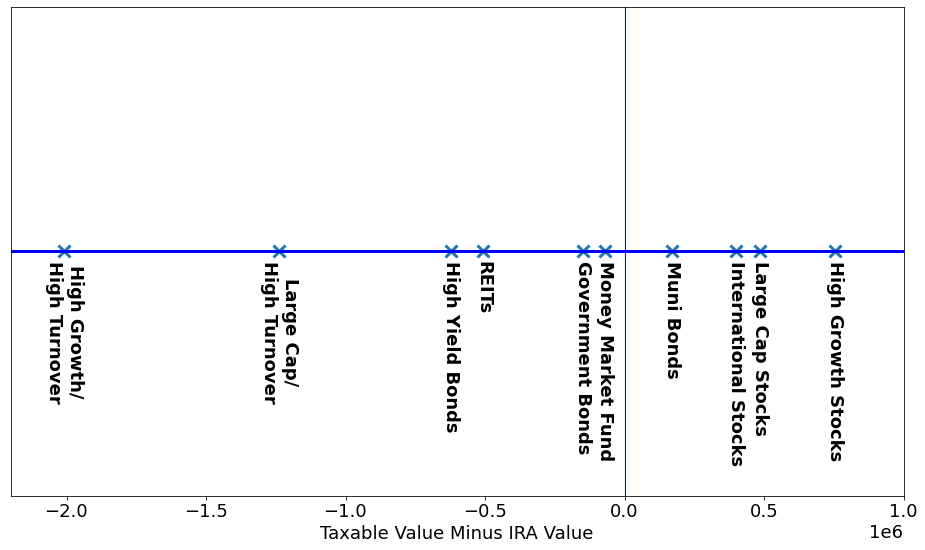

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

l = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10]
assets = ['Large Cap Stocks', 'International Stocks', 'Money Market Fund', 'REITs', 'Large Cap/\nHigh Turnover', 
          'High Yield Bonds', 'High Growth Stocks',
          'High Growth/\nHigh Turnover', 'Muni Bonds', 'Government Bonds']
plt.figure(figsize=(16,9))
plt.plot(l, np.zeros(len(l)), 'x', mew=3, ms=12)
ax = plt.gca()
ax.set_xlim([-2200000, 1000000])
ax.get_yaxis().set_visible(False)
plt.xlabel('Taxable Value Minus IRA Value', size=18)
plt.axhline(y=0.0, color='b', linestyle='-', lw=3)
plt.axvline(x=0, color='b', lw=1)
plt.xticks(fontsize=18)
ax.xaxis.offsetText.set_fontsize(18)
for i, asset in enumerate(assets):
    plt.annotate(asset, (l[i], -0.002), ha='center', va='top', weight='bold', rotation=270, size=18)
#plt.savefig('Fig6_1.png', bbox_inches="tight", dpi=300);
#plt.savefig('Fig6_1.svg', box_inches="tight", format='svg');

For the example in section 8.3.1:

In [39]:
# Create an 11th asset for this example, perhaps a emerging market stock index with high growth/low turnover

em_mkt = Asset(avg_ret=0.095, payout_rate=0.015, tax_rate_payout=0.20, turnover_rate=0.04)
a11 = em_mkt.Taxable_minus_IRA()
print(a11)

12092.61171251908


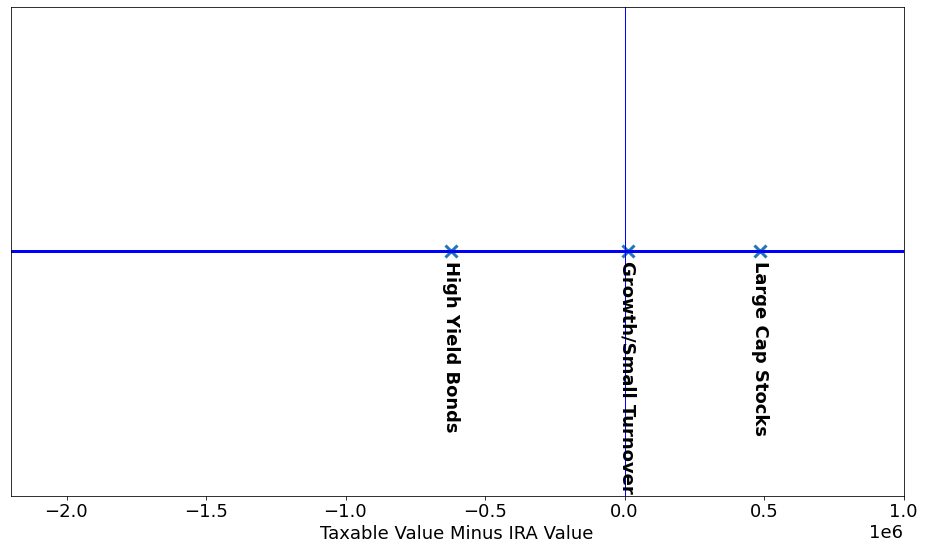

In [37]:
l = [a1, a6, a11]
assets = ['Large Cap Stocks',
          'High Yield Bonds', 'Growth/Small Turnover']
plt.figure(figsize=(16,9))
plt.plot(l, np.zeros(len(l)), 'x', mew=3, ms=12)
ax = plt.gca()
ax.set_xlim([-2200000, 1000000])
ax.get_yaxis().set_visible(False)
plt.xlabel('Taxable Value Minus IRA Value', size=18)
plt.axhline(y=0.0, color='b', linestyle='-', lw=3)
plt.axvline(x=0, color='b', lw=1)
plt.xticks(fontsize=18)
ax.xaxis.offsetText.set_fontsize(18)
for i, asset in enumerate(assets):
    plt.annotate(asset, (l[i], -0.002), ha='center', va='top', weight='bold', rotation=270, size=18)
#plt.savefig('Fig6_2.png', bbox_inches="tight", dpi=300);
#plt.savefig('Fig6_2.svg', box_inches="tight", format='svg');

In [40]:
# Compute the value of each asset type in each account type

p11 = large_cap.IRA_value()
p12 = large_cap.Roth_value()
p13 = large_cap.Taxable_value()
p21 = hi_yield_bond.IRA_value()
p22 = hi_yield_bond.Roth_value()
p23 = hi_yield_bond.Taxable_value()
p31 = em_mkt.IRA_value()
p32 = em_mkt.Roth_value()
p33 = em_mkt.Taxable_value()

In [44]:
# Compute all six combinations of placing assets in accounts
print("large cap in IRA, hi yield in Roth, emerg mkt in Taxable:")
print(p11+p22+p33)
print("large cap in IRA, hi yield in Taxable, emerg mkt in Roth:")
print(p11+p23+p32)
print("large cap in Roth, hi yield in IRA, emerg mkt in Taxable:")
print(p12+p21+p33)
print("large cap in Roth, hi yield in Taxable, emerg mkt in IRA:")
print(p12+p23+p31)
print("large cap in Taxable, hi yield in IRA, emerg mkt in Roth:")
print(p13+p21+p32)
print("large cap in taxable, hi yield in Roth, emerg mkt in IRA:")
print(p13+p22+p31)

large cap in IRA, hi yield in Roth, emerg mkt in Taxable:
12781535.325101089
large cap in IRA, hi yield in Taxable, emerg mkt in Roth:
13279418.592852416
large cap in Roth, hi yield in IRA, emerg mkt in Taxable:
13010383.122619387
large cap in Roth, hi yield in Taxable, emerg mkt in IRA:
12376828.824618213
large cap in Taxable, hi yield in IRA, emerg mkt in Roth:
14387004.70813381
large cap in taxable, hi yield in Roth, emerg mkt in IRA:
13255567.142381309


Of the six combinations, the results above show that the optimal one is:
- Large Cap stocks in Taxable account
- High Yield bonds in IRA account
- Emerging market stocks in Roth accout

For the example in section 8.3.2

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

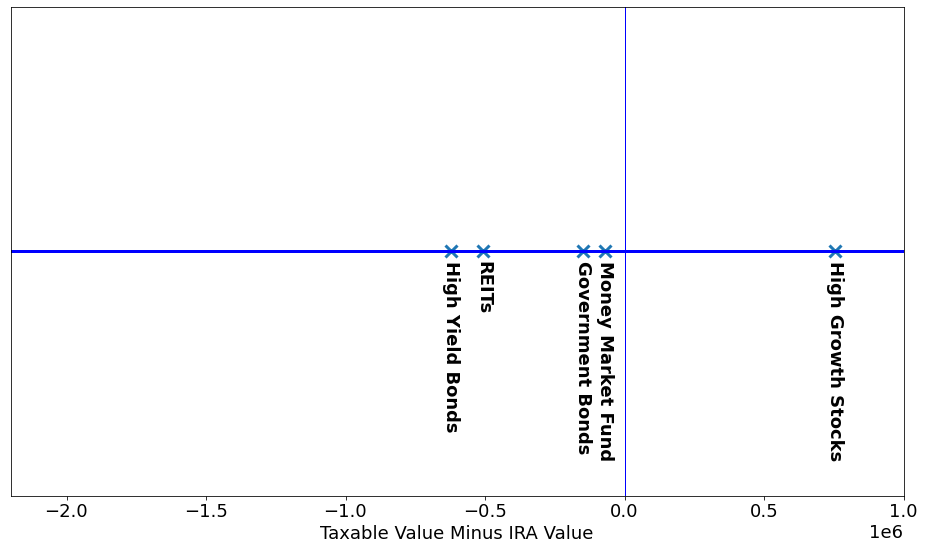

In [62]:
l = [a3, a4, a6, a7, a10]
assets = ['Money Market Fund', 'REITs', 
          'High Yield Bonds', 'High Growth Stocks', 'Government Bonds']
plt.figure(figsize=(16,9))
plt.figure(figsize=(16,9))
plt.figure(figsize=(16,9))
plt.plot(l, np.zeros(len(l)), 'x', mew=3, ms=12)
ax = plt.gca()
ax.set_xlim([-2200000, 1000000])
ax.get_yaxis().set_visible(False)
plt.xlabel('Taxable Value Minus IRA Value', size=18)
plt.axhline(y=0.0, color='b', linestyle='-', lw=3)
plt.axvline(x=0, color='b', lw=1)
plt.xticks(fontsize=18)
ax.xaxis.offsetText.set_fontsize(18)
for i, asset in enumerate(assets):
    plt.annotate(asset, (l[i], -0.002), ha='center', va='top', weight='bold', rotation=270, size=18)
#plt.savefig('Fig6_3.png', bbox_inches="tight", dpi=300);
#plt.savefig('Fig6_3.svg', box_inches="tight", format='svg');

In [67]:
# Compute the 3x5 value matrix which will be an input to the optimizer

ar00 = hi_yield_bond.IRA_value()
ar10 = hi_yield_bond.Roth_value()
ar20 = hi_yield_bond.Taxable_value()
ar01 = bond.IRA_value()
ar11 = bond.Roth_value()
ar21 = bond.Taxable_value()
ar02 = reits.IRA_value()
ar12 = reits.Roth_value()
ar22 = reits.Taxable_value()
ar03 = money_mkt.IRA_value()
ar13 = money_mkt.Roth_value()
ar23 = money_mkt.Taxable_value()
ar04 = hi_growth.IRA_value()
ar14 = hi_growth.Roth_value()
ar24 = hi_growth.Taxable_value()

value_matrix = np.array([[ar00, ar01, ar02, ar03, ar04],
                         [ar10, ar11, ar12, ar13, ar14],
                         [ar20, ar21, ar22, ar23, ar24]], dtype='int64')
print(value_matrix)

[[2845360  788860 3270363  788860 4946601]
 [4377477 1213631 5031328 1213631 7610156]
 [2398898  892456 2939715  892456 5876907]]


Here is the depth-first search algorithm that we used for the optimization 

In [46]:
from frozendict import frozendict
import time

class GeneralizedAssignment():
    """
    Find the assignment that offers the maximum profit.
    
    Special version of the Generalized Assignment Problem, that allows agents
    to be assigned to more than one task.
    
    Assignments are generated through depth-first search, expanding most 
    promising nodes first. True maximum assignment is guaranteed when
    algorithm is allowed to complete. Otherwise, the assignment printed last
    may be used as a best guess.
    
    Optional 'complete' parameter requires agents and tasks to fully use
    their budgets.
    
    Optional 'fair' parameter maximizes the profits related to the least
    profitable task (and thus equalizes the profits among tasks).
    """
    
    def __init__(self, agents, tasks, 
                 agent_budget=lambda a: 1,
                 agent_cost=lambda a, t: 1,
                 task_budget=lambda a: 1,
                 task_cost=lambda a, t: 1,
                 profit=lambda a, t: 1,
                 hard_assignment=False,
                 complete=False,
                 fair=False,
                 verbose=True):
        
        # Register class variables
        self.agents = agents
        self.tasks = tasks
        self.agent_budget = agent_budget
        self.agent_cost = agent_cost
        self.task_budget = task_budget
        self.task_cost = task_cost
        self.profit = profit
        
        self.hard_assignment = hard_assignment
        self.complete = complete
        self.fair = fair
        self.verbose = verbose
        
        # Initialize dictionary of finished assignments and profits
        self.finished_assignments = {}
        self.max_profit = 0
        self.fair_profit = 0
        
        # Find all possible assignments
        init_assignment = self.initialize_assignment()
        
        self.assign({init_assignment})
        
        # Print the best assignment
        if self.verbose: self.print_stats()
    
    
    ######################
    ### MAIN FUNCTIONS ###
    ######################
    
    def initialize_assignment(self):
        """Initialize the assignment state."""
        # Initialize empty frozensets for each agent
        init_assignment = frozendict({a:frozenset() for a in self.agents})
        
        # Add hard assignments
        if self.hard_assignment:
            init_dict = dict(init_assignment)
            for a, t in self.hard_assignment.items():
                init_dict[a] = init_dict[a] | t
            init_assignment = frozendict(init_dict)
            
        return init_assignment
    
    def assign(self, starts):
        start = time.time()
        diff = 0
        #end = time.time()
        #start = 0
        #end = 0
        """Perform depth-first search.
        
        Expanding most promising nodes first. True maximum assignment is
        guaranteed when algorithm is allowed to complete. Otherwise, the 
        assignment printed last may be used as a best guess.
        """
        # Initialize the set of open and closed nodes, and the connection map
        open_set, closed_set = starts, set()
        
        # Initialize a map of assignments and associated profits
        profits = {s:0 for s in starts}
        
        while open_set and (diff<30):
            diff = time.time() - start

            # Explore the most promising node
            current = max(open_set, key=lambda n: profits[n])
            
            # Move the current node from the open set to the closed set
            open_set.remove(current)
            closed_set.add(current)
            
            # Track if assignment is complete
            assignment_finished = True
            
            # Determine all possible next assignment steps
            for agent in self.agents:
                # Determine possible tasks the agent may be assigned to
                poss_tasks = self.assign_agent(agent, current)
                
                # If assignments are possible, the assignment is not complete
                if poss_tasks: assignment_finished = False
                
                for task in poss_tasks:
                    # Determine next assignment step
                    next_dict = dict(current)
                    next_dict[agent] = next_dict[agent] | {task}
                    next_assignment = frozendict(next_dict)
                    
                    # If we have already explored this assignment, continue
                    if next_assignment in closed_set:
                        continue
                    # Else add the assignment to the open set
                    else:
                        open_set.add(next_assignment)
                        profits[next_assignment] = self.calc_profit(next_assignment)
                    
            # If assignment is finished, add it to finished assignments
            if assignment_finished:
                
                # Check if assignment is also complete
                if self.complete and not self.is_complete(current):
                    continue
                
                self.finished_assignments[current] = profits[current]
                
                # Update current fair / max profit and print if applicable
                # Procedure for fair profit (max profit tiebreaker)
                if self.fair:
                    cur_fair_profit = self.calc_fair_profit(current)
                    if ((cur_fair_profit > self.fair_profit) or 
                        (cur_fair_profit == self.fair_profit and
                         profits[current] > self.max_profit)):
                        self.fair_profit = cur_fair_profit
                        self.max_profit = profits[current]
                        #####self.print_assignment(current, profits[current])
                    #####elif (self.verbose and profits[current] >= self.max_profit
                    #####      and cur_fair_profit >= self.fair_profit):
                        #####self.print_assignment(current, profits[current])
                # Procedure for maximum profit
                else:
                    if profits[current] > self.max_profit:
                        self.max_profit = profits[current]
                        ######self.print_assignment(current, profits[current])
                    #####elif self.verbose and profits[current] >= self.max_profit:
                        ######self.print_assignment(current, profits[current])
    def assign_agent(self, agent, assignment):
        """
        Determine possible assignments for a single agent.
        
        Input: agent, assignment definition, current assignment
        Output: list of possible tasks the agent may be assigned to
        """
        
        # Calculate remaining budget for agent
        remaining_budget = self.calc_agent_budget(agent, assignment)
        
        # Determine which tasks the agent has budget for
        tasks_in_budget = {t for t in self.tasks
                           if self.agent_cost(agent, t) <= remaining_budget}
        
        # Agent cannot be assigned to the same task twice
        tasks_in_budget = {t for t in tasks_in_budget if t not in assignment[agent]}
        
        # Determine which tasks have enough budget remaining for the agent
        possible_tasks = []
        for task in tasks_in_budget:
            remaining_task_budget = self.calc_task_budget(task, assignment)
            if self.task_cost(agent, task) <= remaining_task_budget:
                possible_tasks.append(task)
                
        return sorted(possible_tasks)

    ########################
    ### HELPER FUNCTIONS ###
    ########################

    def calc_agent_budget(self, agent, assignment):
        """Calculate remaining budget for agent given the current assignment."""
        budget_spent = sum([self.agent_cost(agent, t) for t in assignment[agent]])
        return self.agent_budget(agent) - budget_spent

    def calc_task_budget(self, task, assignment):
        """Calculate remaining budget for a task given the current assignment."""
        # Get the agents assigned to this task
        agents_assigned = {a for a, tasks in assignment.items() if task in tasks}
        budget_spent = sum([self.task_cost(a, task) for a in agents_assigned])
        return self.task_budget(task) - budget_spent

    def calc_profit(self, assignment):
        """Calculate the profit for a given assignment."""
        return sum([self.profit(agent, task)
                    for agent, tasks in assignment.items() 
                    for task in tasks])

    def calc_fair_profit(self, assignment):
        """Calculate the fair profit for a given assignment."""
        fair_profit = {t:0 for t in self.tasks}
        for agent, tasks in assignment.items():
            for task in tasks:
                fair_profit[task] += self.profit(agent, task)
        return min(fair_profit.values())

    def is_complete(self, assignment):
        """A check whether a finished assignment is also complete."""
        for a in self.agents:
            if self.calc_agent_budget(a, assignment):
                return False
        for t in self.tasks:
            if self.calc_task_budget(t, assignment):
                return False
        return True

    #######################
    ### PRINT FUNCTIONS ###
    #######################

    def print_assignment(self, a, profit):
        """Prettily print an assignment on a single line."""
        a_list = sorted((a,sorted(t)) for a, t in a.items()) 
        a_string = ', '.join(['({}: {})'.format(a, ', '.join(t)) for a, t in a_list])
        print('{} - {}'.format(profit, a_string))
    
    def print_stats(self):
        """Print assignment stats and one max profit assignment."""
        # Determine assignments with the maximum profit
        max_assignments = [a for a,p in self.finished_assignments.items()
                           if p == self.max_profit]
        
        # Print general stats
        print('\nTotal number of assignments: {}'.format(len(self.finished_assignments)))
        if self.fair:
            print('Maximum fair profit: {}'.format(self.max_profit))
            print('Number of max fair profit assignments: {}\n'.format(len(max_assignments)))
        else:
            print('Maximum profit: {}'.format(self.max_profit))
            print('Number of max profit assignments: {}\n'.format(len(max_assignments)))
        
        # Pretty print a single max assignment
        if max_assignments:
            print('Example of a maximum profit assignment:')
            #print(max_assignments)
            for a, t in sorted((a,sorted(t)) for a, t in max_assignments[0].items()):
                print('Agent: {}\tTasks: {}'.format(a, ', '.join(t)))
                # Make solution an attribute
        
        # Add an attribute for an example of max assignment 
        self.solution = max_assignments[0]


We round the amounts to the nearest \$100,000 to simplify the optimization.

In [59]:
# Discretize account type and investments
inc = 100000
acct_vals = [300000, 200000, 500000]
acct_vals = [round(vals/inc)*inc for vals in acct_vals]
investment_vals = [200000, 100000, 200000, 100000, 400000]
investment_vals = [round(vals/inc)*inc for vals in investment_vals]

agents = ['IRA', 'Roth', 'Taxable']
tasks = ['High Yield Bonds', 'Government Bonds', 'REITs', 'Money Market', 'High Growth Stocks']

agent_budget = dict(zip(agents, acct_vals))
agent_cost = lambda a, t: inc

tasks_new = []
for j in range(len(tasks)):
    for k in range(investment_vals[j]//inc):
        tasks_new.append(tasks[j]+str(k))
task_budget = dict(zip(tasks_new,[inc for j in range(len(tasks_new))]))
task_cost = lambda a, t: inc

 
value_matrix = np.array([[ar00, ar01, ar02, ar03, ar04],
                         [ar10, ar11, ar12, ar13, ar14],
                         [ar20, ar21, ar22, ar23, ar24]]) 

profit = {}
for i in range(len(agents)):
    for j in range(len(tasks)):
        for k in range(investment_vals[j]//inc):
            profit[(agents[i], tasks[j]+str(k))] = value_matrix[i,j]

# Optional hard assignments (map of agent: set of tasks)
hard_assignment = {}

# Calculate maximum assignment
FiveAssets = GeneralizedAssignment(agents, tasks_new, lambda a: agent_budget[a], agent_cost,
                      lambda t: task_budget[t], task_cost,
                      lambda a, t: profit[(a,t)],
                      hard_assignment=hard_assignment,
                      complete=True,
                      fair=False)


Total number of assignments: 2520
Maximum profit: 41018205.39180832
Number of max profit assignments: 8

Example of a maximum profit assignment:
Agent: IRA	Tasks: High Yield Bonds0, High Yield Bonds1, REITs1
Agent: Roth	Tasks: High Growth Stocks2, REITs0
Agent: Taxable	Tasks: Government Bonds0, High Growth Stocks0, High Growth Stocks1, High Growth Stocks3, Money Market0


In [54]:
d = FiveAssets.solution

ar = np.zeros((len(agents), len(tasks)), dtype=int)

for i,a in enumerate(agents):
    for j,t in enumerate(tasks):
        sum_tasks = 0
        for task in d[a]:
            if t == task[0:len(t)]:
                sum_tasks += inc
        ar[i,j] = sum_tasks
        
print(ar)

[[200000      0 100000      0      0]
 [     0      0 100000      0 100000]
 [     0 100000      0 100000 300000]]


In [55]:
df = pd.DataFrame(ar, index=agents, columns=tasks)
df

,High Yield Bonds,Government Bonds,REITs,Money Market,High Growth Stocks
IRA,200000,0,100000,0,0
Roth,0,0,100000,0,100000
Taxable,0,100000,0,100000,300000


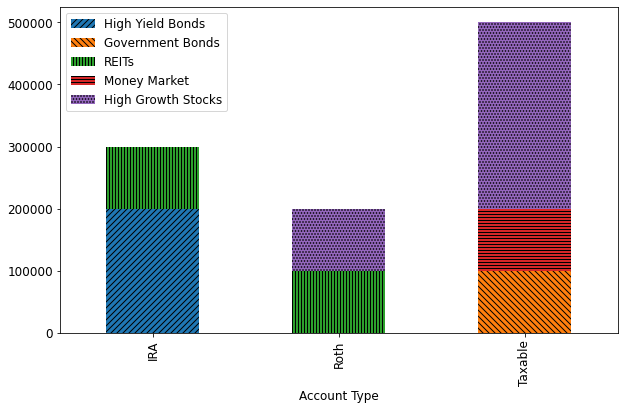

In [65]:
df.columns.name = 'Investments'
df.index.name = 'Account Type'

import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
matplotlib.rc('axes', titlesize=12)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=12)    # fontsize of the x and y labels
ax = plt.figure(figsize=(10, 6)).add_subplot(111)
df.plot(ax=ax, kind='bar', stacked=True, legend=False)

bars = ax.patches
#patterns =('//', '\\\\', '||', '--', '++', 'xx', 'oo', 'OO', '..', '**')
patterns =('////', '\\\\\\\\', '||||', '----', '....', 'xx', 'oo', 'OO', '++', '**')
hatches = [p for p in patterns for i in range(len(df))]
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend(loc='best', prop={'size': 10}, bbox_to_anchor=(1, 1), ncol=4)
plt.legend(loc='upper left', prop={'size': 12})
#plt.savefig('Fig6_4.png', bbox_inches="tight", dpi=300);
#plt.savefig('Fig6_4.svg', box_inches="tight", format='svg');